In [1]:
import psycopg2
import pandas as pd

In [2]:
import numpy as np

In [8]:
from adjustText import adjust_text


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.decomposition import PCA

In [6]:
import seaborn as sns

In [7]:
import psycopg2
from psycopg2 import OperationalError
# Define connection parameters
dbname = "telecomdb"
user = "postgres"
password = "admin"
host = "localhost"
port = "5432"
try:
    # Establish a connection to the database
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    
    # Create a cursor object using the connection
    cursor = conn.cursor()
    
    # Query to fetch columns of the table "xdr_data"
    query = """
    SELECT column_name
    FROM information_schema.columns
    WHERE table_schema = %s AND table_name = %s
    """
    
    # Execute the query with parameters
    cursor.execute(query, ('public', 'xdr_data'))

    # Fetch all results
    columns = cursor.fetchall()
    
    # Print the column names
    print("Columns of the table 'xdr_data':")
    for column in columns:
        print(column[0])

except OperationalError as e:
    print("Error: Could not connect to the database.", e)

finally:
    # Close the cursor and connection
    if 'cursor' in locals() and cursor is not None:
        cursor.close()
    if 'conn' in locals() and conn is not None:
        conn.close()

Columns of the table 'xdr_data':
Bearer Id
Start
Start ms
End
End ms
Dur. (ms)
IMSI
MSISDN/Number
IMEI
Last Location Name
Avg RTT DL (ms)
Avg RTT UL (ms)
Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)
DL TP < 50 Kbps (%)
50 Kbps < DL TP < 250 Kbps (%)
250 Kbps < DL TP < 1 Mbps (%)
DL TP > 1 Mbps (%)
UL TP < 10 Kbps (%)
10 Kbps < UL TP < 50 Kbps (%)
50 Kbps < UL TP < 300 Kbps (%)
UL TP > 300 Kbps (%)
HTTP DL (Bytes)
HTTP UL (Bytes)
Activity Duration DL (ms)
Activity Duration UL (ms)
Dur. (ms).1
Handset Manufacturer
Handset Type
Nb of sec with 125000B < Vol DL
Nb of sec with 1250B < Vol UL < 6250B
Nb of sec with 31250B < Vol DL < 125000B
Nb of sec with 37500B < Vol UL
Nb of sec with 6250B < Vol DL < 31250B
Nb of sec with 6250B < Vol UL < 37500B
Nb of sec with Vol DL < 6250B
Nb of sec with Vol UL < 1250B
Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (

In [8]:

# Define connection parameters
dbname = "telecomdb"
user = "postgres"
password = "admin"
host = "localhost"
port = "5432"

try:
    # Establish a connection to the database
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    print("Connected to the database.")
    
    # Create a cursor object using the connection
    cursor = conn.cursor()

    # SQL query to aggregate per user information
    query = """
    SELECT "MSISDN/Number",
           COUNT(*) AS num_sessions,
           SUM("Dur. (ms)") AS total_session_duration,
           SUM("Total UL (Bytes)") AS total_ul_data,
           SUM("Total DL (Bytes)") AS total_dl_data,
           SUM("Social Media DL (Bytes)" + "Social Media UL (Bytes)") AS social_media_data,
           SUM("Google DL (Bytes)" + "Google UL (Bytes)") AS google_data,
           SUM("Email DL (Bytes)" + "Email UL (Bytes)") AS email_data,
           SUM("Youtube DL (Bytes)" + "Youtube UL (Bytes)") AS youtube_data,
           SUM("Netflix DL (Bytes)" + "Netflix UL (Bytes)") AS netflix_data,
           SUM("Gaming DL (Bytes)" + "Gaming UL (Bytes)") AS gaming_data,
           SUM("Other DL (Bytes)" + "Other UL (Bytes)") AS other_data
    FROM xdr_data
    GROUP BY "MSISDN/Number"
    """

    # Execute the query
    cursor.execute(query)

    # Fetch all results into a DataFrame
    columns = [desc[0] for desc in cursor.description]
    user_data = pd.DataFrame(cursor.fetchall(), columns=columns)

    # Close the cursor
    cursor.close()
    
    # Print first few rows of the DataFrame
    print(user_data.head())

    # Close the connection
    conn.close()
    print("Connection to the database closed.")

except psycopg2.Error as e:
    print("Error: Could not connect to the database.", e)


Connected to the database.
   MSISDN/Number  num_sessions  total_session_duration  total_ul_data  \
0   3.360100e+10             1                116720.0     36053108.0   
1   3.360100e+10             1                181230.0     36104459.0   
2   3.360100e+10             1                134969.0     39306820.0   
3   3.360101e+10             1                 49878.0     20327526.0   
4   3.360101e+10             2                 37104.0     94280527.0   

   total_dl_data  social_media_data  google_data  email_data  youtube_data  \
0   8.426375e+08          2232135.0    4389005.0   1331362.0    21624548.0   
1   1.207552e+08          2660565.0    5334863.0   3307781.0    12432223.0   
2   5.566597e+08          3195623.0    3443126.0   3205380.0    21333570.0   
3   4.019932e+08           280294.0    9678493.0   2284670.0     6977321.0   
4   1.363130e+09          2912542.0   18499616.0   3305469.0    41533002.0   

   netflix_data   gaming_data   other_data  
0    27180981.0  8.1

In [12]:
user_data.head()

,MSISDN/Number,num_sessions,total_session_duration,total_ul_data,total_dl_data,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [13]:
# Describe all relevant variables and associated data types
print(user_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106857 entries, 0 to 106856
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MSISDN/Number           106856 non-null  float64
 1   num_sessions            106857 non-null  int64  
 2   total_session_duration  106857 non-null  float64
 3   total_ul_data           106857 non-null  float64
 4   total_dl_data           106857 non-null  float64
 5   social_media_data       106857 non-null  float64
 6   google_data             106857 non-null  float64
 7   email_data              106857 non-null  float64
 8   youtube_data            106857 non-null  float64
 9   netflix_data            106857 non-null  float64
 10  gaming_data             106857 non-null  float64
 11  other_data              106857 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.8 MB
None


In [14]:
# Analyze basic metrics
print("Basic Metrics:")
print(user_data.describe())


Basic Metrics:
       MSISDN/Number   num_sessions  total_session_duration  total_ul_data  \
count   1.068560e+05  106857.000000            1.068570e+05   1.068570e+05   
mean    4.511474e+10       1.403755            1.468438e+05   5.772370e+07   
std     2.889423e+12       3.355032            2.892198e+05   1.400375e+08   
min     3.360100e+10       1.000000            7.142000e+03   2.866892e+06   
25%     3.365088e+10       1.000000            7.130900e+04   3.639554e+07   
50%     3.366365e+10       1.000000            1.027410e+05   4.679434e+07   
75%     3.368344e+10       2.000000            1.727990e+05   6.573376e+07   
max     8.823971e+14    1066.000000            7.244640e+07   4.432530e+10   

       total_dl_data  social_media_data   google_data    email_data  \
count   1.068570e+05       1.068570e+05  1.068570e+05  1.068570e+05   
mean    6.382035e+08       2.566415e+06  1.095953e+07  3.171225e+06   
std     1.558474e+09       6.325032e+06  2.630542e+07  7.661339e+06  

In [31]:
# Compute dispersion parameters for each quantitative variable
dispersion_parameters = user_data.var()
print("Dispersion Parameters:")
print(dispersion_parameters)


Dispersion Parameters:
MSISDN/Number             8.348768e+24
num_sessions              1.125624e+01
total_session_duration    8.364809e+10
total_ul_data             1.961050e+16
total_dl_data             2.428841e+18
social_media_data         4.000603e+13
google_data               6.919751e+14
email_data                5.869612e+13
youtube_data              5.983623e+15
netflix_data              5.943821e+15
gaming_data               2.189520e+18
other_data                2.099786e+18
dtype: float64


In [32]:
user_data.columns

Index(['MSISDN/Number', 'num_sessions', 'total_session_duration',
       'total_ul_data', 'total_dl_data', 'social_media_data', 'google_data',
       'email_data', 'youtube_data', 'netflix_data', 'gaming_data',
       'other_data'],
      dtype='object')

In [17]:
# pip uninstall matplotlib

In [18]:
#pip install matplotlib


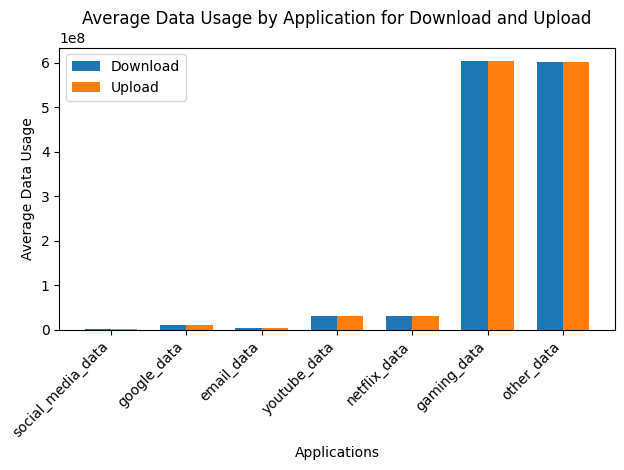

        total_dl_data  social_media_data   google_data    email_data  \
0        8.426375e+08       2.232135e+06  4.389005e+06  1.331362e+06   
1        1.207552e+08       2.660565e+06  5.334863e+06  3.307781e+06   
2        5.566597e+08       3.195623e+06  3.443126e+06  3.205380e+06   
3        4.019932e+08       2.802940e+05  9.678493e+06  2.284670e+06   
4        1.363130e+09       2.912542e+06  1.849962e+07  3.305469e+06   
...               ...                ...           ...           ...   
106852   4.445751e+08       4.985690e+05  5.429705e+06  2.514097e+06   
106853   1.948281e+08       7.152240e+05  1.043866e+07  1.520771e+06   
106854   5.396350e+08       5.215660e+05  9.830617e+06  3.318582e+06   
106855   7.869760e+07       1.546088e+06  9.218647e+06  3.330974e+06   
106856   4.869236e+11       1.973817e+09  8.248577e+09  2.399880e+09   

        youtube_data  netflix_data   gaming_data    other_data  
0       2.162455e+07  2.718098e+07  8.124587e+08  3.865709e+08  
1    

In [42]:
class DataVisualizer:
    def __init__(self, user_data, applications):
        self.user_data = user_data
        self.applications = applications
        self.download_data = None
        self.upload_data = None

    def plot_data_usage(self):
        # Extracting the applications and corresponding data
        download_data = self.user_data[['total_dl_data'] + self.applications]
        upload_data = self.user_data[['total_ul_data'] + self.applications]

        # Storing data for access outside the method
        self.download_data = download_data
        self.upload_data = upload_data

        # Plotting
        num_apps = len(self.applications)
        bar_width = 0.35
        index = np.arange(num_apps)

        # Grouped bar plot for download data
        plt.bar(index, download_data.mean()[1:], bar_width, label='Download')
        # Grouped bar plot for upload data (shifted by bar_width for separation)
        plt.bar(index + bar_width, upload_data.mean()[1:], bar_width, label='Upload')

        plt.xlabel('Applications')
        plt.ylabel('Average Data Usage')
        plt.title('Average Data Usage by Application for Download and Upload')
        plt.xticks(index + bar_width / 2, self.applications, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage:
applications = ['social_media_data', 'google_data', 'email_data',
                'youtube_data', 'netflix_data', 'gaming_data', 'other_data']

visualizer = DataVisualizer(user_data, applications)
visualizer.plot_data_usage()
print(visualizer.download_data)
print(visualizer.upload_data)


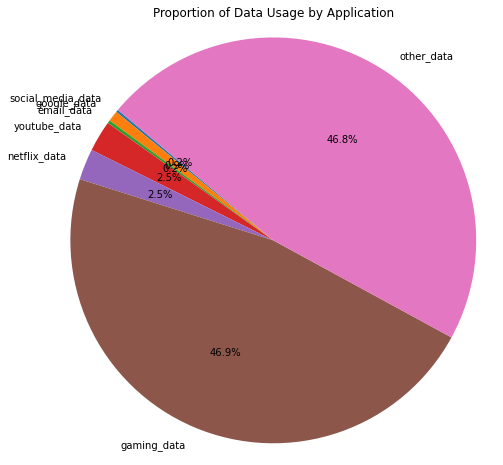

Total data usage for each application in %  social_media_data     0.199402
google_data           0.851520
email_data            0.246394
youtube_data          2.469663
netflix_data          2.468041
gaming_data          46.935265
other_data           46.829714
dtype: float64


In [20]:
# Calculate total data usage for each application
total_data_usage = user_data[applications].sum()

# Calculate total data usage as percentages
total_data_usage_percent = (total_data_usage / total_data_usage.sum()) * 100

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_data_usage_percent, labels=applications, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Usage by Application')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print("Total data usage for each application in % " ,total_data_usage_percent)

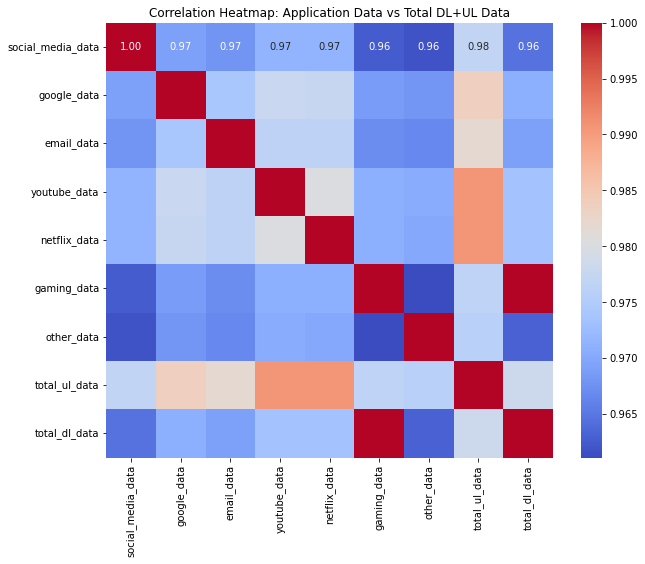

,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data,total_ul_data,total_dl_data
social_media_data,1.000000,0.968997,0.967901,0.971348,0.971320,0.962460,0.961808,0.976816,0.964453
google_data,0.968997,1.000000,0.974074,0.977704,0.977460,0.968683,0.967954,0.983584,0.970909
email_data,0.967901,0.974074,1.000000,0.976294,0.976301,0.967100,0.966628,0.981800,0.969104
youtube_data,0.971348,0.977704,0.976294,1.000000,0.980116,0.970937,0.970384,0.990707,0.973332
netflix_data,0.971320,0.977460,0.976301,0.980116,1.000000,0.970874,0.969937,0.990675,0.973269
gaming_data,0.962460,0.968683,0.967100,0.970937,0.970874,1.000000,0.961084,0.976452,0.999913
other_data,0.961808,0.967954,0.966628,0.970384,0.969937,0.961084,1.000000,0.975793,0.962944
total_ul_data,0.976816,0.983584,0.981800,0.990707,0.990675,0.976452,0.975793,1.000000,0.978183
total_dl_data,0.964453,0.970909,0.969104,0.973332,0.973269,0.999913,0.962944,0.978183,1.000000


In [21]:
# Compute the correlation matrix
correlation_matrix = user_data[applications + ['total_ul_data', 'total_dl_data']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Application Data vs Total DL+UL Data')
plt.show()

correlation_matrix

Total Data (DL+UL) per Decile Class:
        total_ul_data  total_dl_data
decile                              
0        9.547430e+11   1.059394e+13
1        1.044428e+12   1.152621e+13
2        9.605178e+11   1.060947e+13
3        1.157958e+12   1.281675e+13
4        2.050534e+12   2.265014e+13


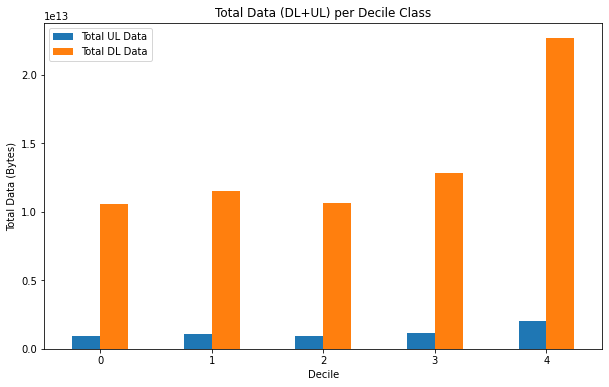

In [22]:
# Segment the users into decile classes based on total session duration
deciles = pd.qcut(user_data['total_session_duration'], q=5, labels=False)
user_data['decile'] = deciles
# Compute total data (DL+UL) per decile class
total_data_per_decile = user_data.groupby('decile')[['total_ul_data', 'total_dl_data']].sum()
print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)
# Plot Total Data (DL+UL) per Decile Class
total_data_per_decile.plot(kind='bar', figsize=(10, 6))
plt.title('Total Data (DL+UL) per Decile Class')
plt.xlabel('Decile')
plt.ylabel('Total Data (Bytes)')
plt.xticks(rotation=0)
plt.legend(['Total UL Data', 'Total DL Data'])
plt.show()

In [23]:
num_decile_classes = user_data['decile'].nunique()
print("Number of Decile Classes:", num_decile_classes)


Number of Decile Classes: 5


In [24]:

# # PCA

# from sklearn.manifold import TSNE
# from adjustText import adjust_text
# # Reduce dimensionality with t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# tsne_components = tsne.fit_transform(user_data[['social_media_data', 'google_data', 'email_data', 
#                                                  'youtube_data', 'netflix_data', 'gaming_data', 'other_data']])

# # Visualize results
# tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
# plt.figure(figsize=(10, 8))
# plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], color='blue')

# # Add labels to data points
# texts = []
# for i, txt in enumerate(user_data.index):
#     texts.append(plt.text(tsne_df['TSNE1'][i], tsne_df['TSNE2'][i], txt))

# # Adjust the positions of text labels to avoid overlap
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.title('t-SNE Visualization')
# plt.grid(True)
# plt.show()


Feature Importances:
num_sessions: 0.0
total_session_duration: 1.0
total_ul_data: 0.0
total_dl_data: 0.0
social_media_data: 0.0
google_data: 0.0
email_data: 0.0
youtube_data: 0.0
netflix_data: 0.0
gaming_data: 0.0
other_data: 0.0


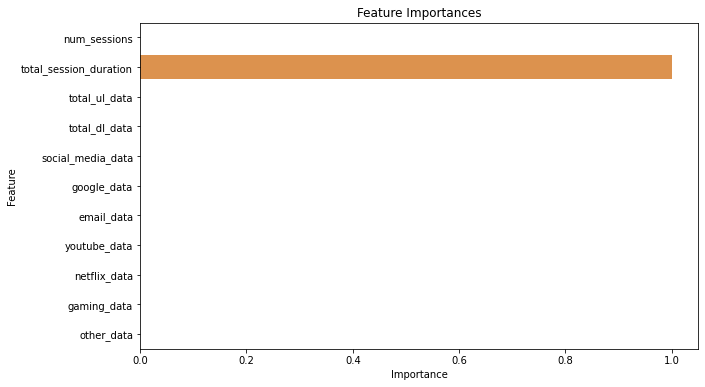

In [25]:
# Separate features and target variable
X = user_data.drop(columns=['MSISDN/Number', 'decile'])  # Features
y = user_data['decile']  # Target variable

# Fit Random Forest model to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Step 4: Feature Importance
print("Feature Importances:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

# Step 5: Visualization
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [26]:

# Analysis:
# - The Random Forest model indicates that 'total_session_duration' is the most important feature for predicting the 'decile' value, while all other features have negligible importance.
# - There appears to be a strong relationship between total session duration and the target variable, with longer sessions likely corresponding to higher decile values.

# Recommendations:
# - Focus on strategies that increase total session duration, such as improving user engagement, enhancing content relevance, or optimizing user experience.
# - Explore ways to personalize content or services based on user session behavior to encourage longer and more frequent sessions.
# - Consider implementing features or incentives that incentivize users to extend their session duration or increase their engagement with the platform.

# Step 7: Risk Assessment

# Considerations:
# - Validate Results: Validate the findings of the Random Forest model by conducting additional analyses or experiments to confirm the importance of 'total_session_duration' and understand its impact on user behavior.
# - External Factors: Consider external factors that may influence session duration, such as seasonality, marketing campaigns, or changes in user preferences or demographics.
# - Data Quality: Ensure the accuracy and reliability of data related to session duration to avoid biases or inaccuracies in the analysis.

# Step 8: Continuous Monitoring

# Considerations:
# - Monitor Changes: Continuously monitor changes in user behavior, session patterns, and platform usage to identify any shifts in trends or patterns.
# - Experimentation: Conduct experiments or A/B tests to evaluate the effectiveness of strategies aimed at increasing session duration and measure their impact on user engagement and satisfaction.
# - Adaptation: Adapt strategies and interventions based on ongoing monitoring and feedback to optimize session duration and enhance user experience over time.

# Emphasize the importance of focusing on 'total_session_duration' as a key driver of user engagement and business success, while remaining vigilant about external factors and data quality considerations.


# Task 2

# Step 1: Aggregating Engagement Metrics Per Customer aggregate session frequency, session duration, and total session traffic per customer.
# Report the top 10 customers per engagement metric.

In [ ]:

class DataAggregator:
    def __init__(self, user_data):
        self.user_data = user_data

    def aggregate_engagement_metrics(self):
        # Aggregate session frequency, duration, and total traffic per customer
        engagement_metrics = self.user_data.groupby('MSISDN/Number').agg({
            'num_sessions': 'count',
            'total_session_duration': 'sum',
            'total_ul_data': 'sum',
            'total_dl_data': 'sum'
        })

        # Plot histograms for session frequency, duration, and total traffic
        self.plot_histograms(engagement_metrics)

        return engagement_metrics

    def plot_histograms(self, engagement_metrics):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.hist(engagement_metrics['num_sessions'], bins=20, color='skyblue')
        plt.title('Session Frequency')
        plt.xlabel('Number of Sessions')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        plt.hist(engagement_metrics['total_session_duration'], bins=20, color='salmon')
        plt.title('Session Duration')
        plt.xlabel('Session Duration (ms)')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        plt.hist(engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], bins=20, color='lightgreen')
        plt.title('Total Session Traffic')
        plt.xlabel('Total Traffic (Bytes)')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

data_aggregator = DataAggregator(user_data)

# Call the aggregate_engagement_metrics method
engagement_metrics = data_aggregator.aggregate_engagement_metrics()
engagement_metrics

# Step 2: Normalize Engagement Metrics Normalize each engagement metric to prepare for clustering.Run a k-means clustering algorithm with appriopraite k- means value from elbow analysis to classify customers based on engagement.

In [28]:
# Check for NaN values
nan_values = user_data.isna().sum()

# Print NaN values for each column
print("NaN values in each column:")
print(nan_values)

NaN values in each column:
MSISDN/Number             1
num_sessions              0
total_session_duration    0
total_ul_data             0
total_dl_data             0
social_media_data         0
google_data               0
email_data                0
youtube_data              0
netflix_data              0
gaming_data               0
other_data                0
decile                    0
dtype: int64


# Normalization for clustering

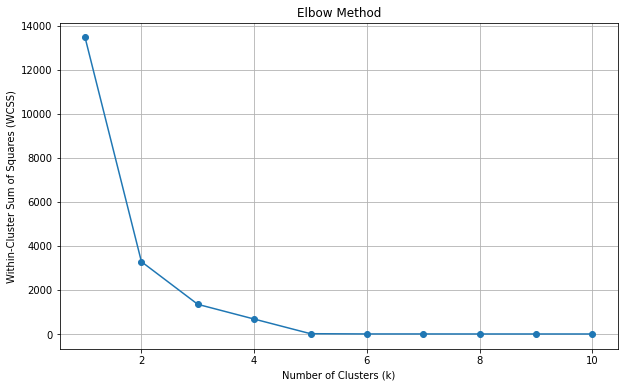

In [29]:

def elbow_method(data, max_k):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Calculate WCSS for different values of k
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_data)
        wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares
        
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True)
    plt.show()

# Example usage:
# Define your data and maximum value of K
max_k = 10

# Call the elbow_method function with your data and maximum K
elbow_method(user_data, max_k)


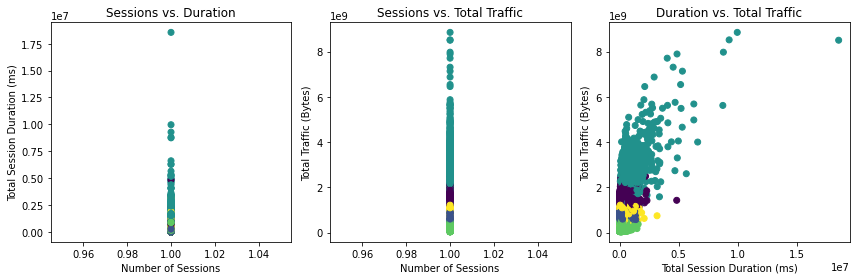

               num_sessions  total_session_duration  total_ul_data  \
MSISDN/Number                                                        
3.360100e+10              1                116720.0     36053108.0   
3.360100e+10              1                181230.0     36104459.0   
3.360100e+10              1                134969.0     39306820.0   
3.360101e+10              1                 49878.0     20327526.0   
3.360101e+10              1                 37104.0     94280527.0   
...                     ...                     ...            ...   
3.379000e+10              1                  8810.0     26716429.0   
3.379000e+10              1                140988.0     35732243.0   
3.197021e+12              1                877385.0     37295915.0   
3.370000e+14              1                253030.0     56652839.0   
8.823971e+14              1                869844.0     60456049.0   

               total_dl_data  Cluster  
MSISDN/Number                          
3.360100e

In [30]:
def clustering(engagement_metrics):
    # Normalize engagement metrics
    scaler = MinMaxScaler()
    normalized_engagement_metrics = scaler.fit_transform(engagement_metrics)

    # Perform k-means clustering with k=5
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(normalized_engagement_metrics)
    cluster_labels = kmeans.labels_
    engagement_metrics['Cluster'] = cluster_labels

    # Plot clustered metrics
    plot_clustered_metrics(engagement_metrics)

    return engagement_metrics

def plot_clustered_metrics(engagement_metrics):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(engagement_metrics['num_sessions'], engagement_metrics['total_session_duration'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Sessions vs. Duration')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Total Session Duration (ms)')

    plt.subplot(1, 3, 2)
    plt.scatter(engagement_metrics['num_sessions'], engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Sessions vs. Total Traffic')
    plt.xlabel('Number of Sessions')
    plt.ylabel('Total Traffic (Bytes)')

    plt.subplot(1, 3, 3)
    plt.scatter(engagement_metrics['total_session_duration'], engagement_metrics['total_ul_data'] + engagement_metrics['total_dl_data'], c=engagement_metrics['Cluster'], cmap='viridis')
    plt.title('Duration vs. Total Traffic')
    plt.xlabel('Total Session Duration (ms)')
    plt.ylabel('Total Traffic (Bytes)')

    plt.tight_layout()
    plt.show()

# Example usage:
# Call the function to cluster and plot the metrics
clustered_metrics = clustering(engagement_metrics)
print(clustered_metrics)

        num_sessions                 total_session_duration              \
                 min max mean    sum                    min         max   
Cluster                                                                   
0                  1   1  1.0   9595                21994.0   4838428.0   
1                  1   1  1.0  39905                 7142.0   1375612.0   
2                  1   1  1.0   2486                66594.0  18553754.0   
3                  1   1  1.0  40119                 7189.0   1573420.0   
4                  1   1  1.0  14751                 9144.0   3174824.0   

                                     total_ul_data                             \
                  mean           sum           min          max          mean   
Cluster                                                                         
0        266067.182699  2.552915e+09    36109557.0  221537101.0  1.047036e+08   
1        106724.635635  4.258847e+09     2866892.0   70027127.0  4.122554e+

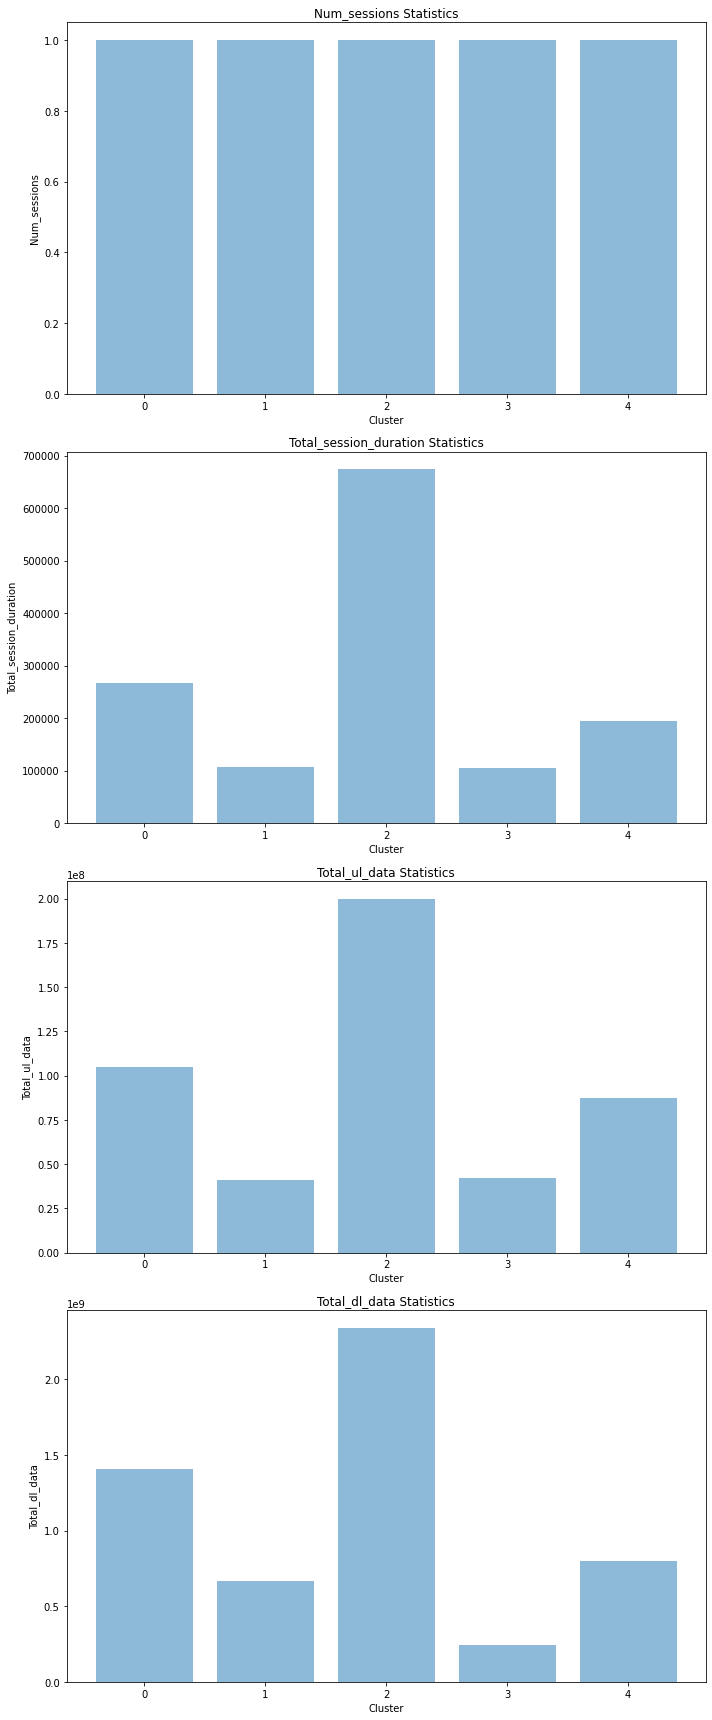

In [31]:
def compute_cluster_statistics(engagement_metrics):
    """
    Computes statistics for each cluster based on engagement metrics.

    Parameters:
        engagement_metrics (DataFrame): DataFrame containing engagement metrics.

    Returns:
        DataFrame: Statistics for each cluster.
    """
    cluster_statistics = engagement_metrics.groupby('Cluster').agg({
        'num_sessions': ['min', 'max', 'mean', 'sum'],
        'total_session_duration': ['min', 'max', 'mean', 'sum'],
        'total_ul_data': ['min', 'max', 'mean', 'sum'],
        'total_dl_data': ['min', 'max', 'mean', 'sum']
    })
    return cluster_statistics


def plot_cluster_statistics(cluster_statistics):
    """
    Plots statistics for each cluster.

    Parameters:
        cluster_statistics (DataFrame): DataFrame containing statistics for each cluster.
    """
    metrics = cluster_statistics.columns.levels[0]
    num_plots = len(metrics)

    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

    for i, metric in enumerate(metrics):
        ax = axes[i]
        ax.bar(cluster_statistics.index, cluster_statistics[(metric, 'mean')], alpha=0.5, align='center', capsize=5)
        ax.set_title(f'{metric.capitalize()} Statistics')
        ax.set_xlabel('Cluster')
        ax.set_ylabel(metric.capitalize())
        ax.set_xticks(cluster_statistics.index)

    plt.tight_layout()
    plt.show()


# Call the function to compute and plot cluster statistics
cluster_statistics = compute_cluster_statistics(engagement_metrics)
print(cluster_statistics)
plot_cluster_statistics(cluster_statistics)


In [32]:
print(user_data.columns)


Index(['MSISDN/Number', 'num_sessions', 'total_session_duration',
       'total_ul_data', 'total_dl_data', 'social_media_data', 'google_data',
       'email_data', 'youtube_data', 'netflix_data', 'gaming_data',
       'other_data', 'decile'],
      dtype='object')


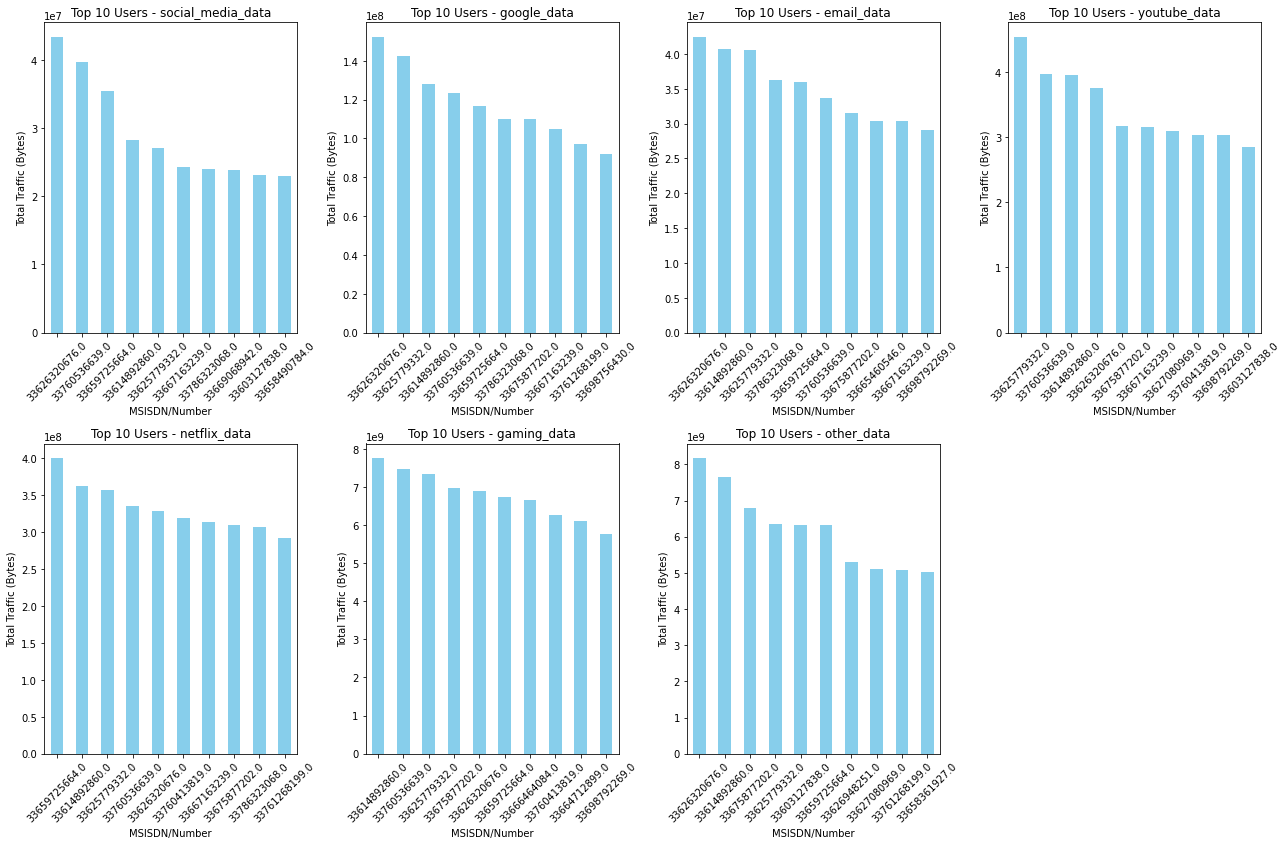

{'social_media_data': MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849e+10    23000066.0
Name: social_media_data, dtype: float64, 'google_data': MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
Name: google_data, dtype: float64, 'email_data': MSISDN/Number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    30335796.0
3.369879e+10    29059042.0
Name: email

In [33]:
class ApplicationEngagement:
    def __init__(self, user_data):
        self.user_data = user_data

    def top_engaged_users_per_app(self):
        user_traffic_per_app = self.user_data.groupby('MSISDN/Number')[['social_media_data', 'google_data',
                                                                        'email_data', 'youtube_data',
                                                                        'netflix_data', 'gaming_data',
                                                                        'other_data']].sum()

        top_10_users_per_app = {}
        for column in user_traffic_per_app.columns:
            top_10_users_per_app[column] = user_traffic_per_app[column].nlargest(10)

        self.plot_top_engaged_users(top_10_users_per_app)
        return top_10_users_per_app

    def plot_top_engaged_users(self, top_10_users_per_app):
        num_apps = len(top_10_users_per_app)
        num_rows = 2  # Adjust the number of rows and columns as needed
        num_cols = int(np.ceil(num_apps / num_rows))

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

        for i, (app, top_users) in enumerate(top_10_users_per_app.items()):
            ax = axes[i // num_cols, i % num_cols] if num_apps > 1 else axes
            top_users.plot(kind='bar', color='skyblue', ax=ax)
            ax.set_title(f'Top 10 Users - {app}')
            ax.set_xlabel('MSISDN/Number')
            ax.set_ylabel('Total Traffic (Bytes)')
            ax.tick_params(axis='x', rotation=45)
        
        for j in range(i + 1, num_rows * num_cols):
            fig.delaxes(axes[j // num_cols, j % num_cols])

        plt.tight_layout()
        plt.show()

# Example usage:
app_engagement = ApplicationEngagement(user_data)
top_users_per_app = app_engagement.top_engaged_users_per_app()
print(top_users_per_app)


In [34]:
# Top three mostly used apps

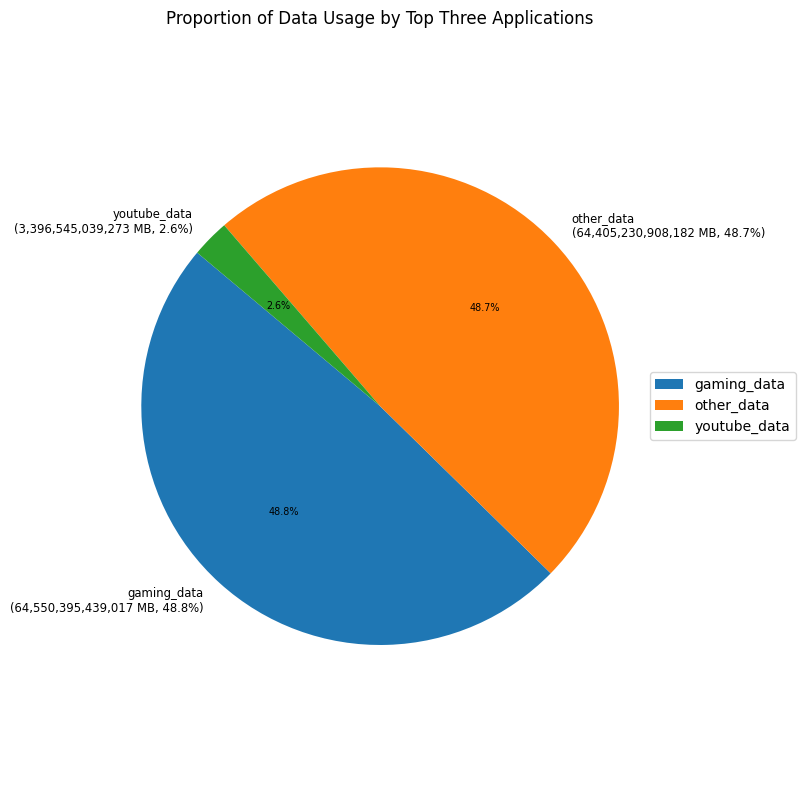

gaming_data     6.455040e+13
other_data      6.440523e+13
youtube_data    3.396545e+12
dtype: float64

In [43]:
# Calculate total data usage for each application
total_data_usage = user_data[applications].sum()

# Sort applications based on total data usage and select the top three
top_three_apps = total_data_usage.nlargest(3)

# Prepare labels with both application names, percentages, and usage values for top three apps
labels = [f"{app}\n({total_data_usage[app]:,.0f} MB, {percent:.1f}%)"
          for app, percent in zip(top_three_apps.index, (top_three_apps / top_three_apps.sum() * 100))]

# Plotting pie chart for top three apps
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(top_three_apps, labels=labels, autopct='%1.1f%%', startangle=140)

# Adjust layout and spacing of labels
for text, autotext in zip(texts, autotexts):
    text.set_size('smaller')
    autotext.set_size('x-small')

plt.title('Proportion of Data Usage by Top Three Applications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend outside the pie chart
plt.legend(top_three_apps.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()
total_data_usage
top_three_apps


In [9]:

# Define connection parameters
dbname = "telecomdb"
user = "postgres"
password = "admin"
host = "localhost"
port = "5432"

try:
    # Establish a connection to the database
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    
    # Create a cursor object using the connection
    cursor = conn.cursor()
    
    # Query to fetch all columns of the table "xdr_data"
    query = """
    SELECT *
    FROM public.xdr_data
    """
    
    # Execute the query
    cursor.execute(query)
    
    # Fetch all results into a DataFrame
    user_data1 = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

    # Close the cursor
    cursor.close()

except OperationalError as e:
    print("Error: Could not connect to the database.", e)

finally:
    # Close the connection
    if 'conn' in locals() and conn is not None:
        conn.close()

# Now you have the complete user_data DataFrame
# You can use this DataFrame in your UserExperienceAnalysis class


In [25]:

user_data.head()

,MSISDN/Number,num_sessions,total_session_duration,total_ul_data,total_dl_data,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,other_data
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [14]:
user_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [28]:
user_data1.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
# Task 3 - Experience Analytics

# Aggregate per customer information

In [22]:
class UserExperienceAnalysis:
    def __init__(self, user_data1):
        self.user_data1 = user_data1

    def aggregate_per_customer(self):
        # Aggregate per customer information
        per_customer_info = self.user_data1.groupby('MSISDN/Number').agg({
            'Avg RTT DL (ms)': 'mean',
            'Avg Bearer TP DL (kbps)': 'mean',
            'Handset Type': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,
            'TCP DL Retrans. Vol (Bytes)': 'mean'
        })
        return per_customer_info

    def summary_statistics(self, per_customer_info):
        # Summary statistics
        summary_stats = per_customer_info.describe()
        return summary_stats

# Instantiate the UserExperienceAnalysis class with your user_data DataFrame
experience_analytics = UserExperienceAnalysis(user_data1)

# Call the method to aggregate per customer information
per_customer_info = experience_analytics.aggregate_per_customer()

# Compute and print summary statistics
summary_stats = experience_analytics.summary_statistics(per_customer_info)
print(summary_stats)


       Avg RTT DL (ms)  Avg Bearer TP DL (kbps)  TCP DL Retrans. Vol (Bytes)
count     88320.000000            106856.000000                 4.852400e+04
mean        119.182869             11633.998253                 1.685339e+07
std         642.354308             20605.733177                 1.465428e+08
min           0.000000                 0.000000                 2.000000e+00
25%          32.000000                43.000000                 2.613000e+04
50%          45.000000               110.000000                 4.256980e+05
75%          70.000000             16816.250000                 3.202019e+06
max       96923.000000            264448.000000                 4.289488e+09


In [25]:
#  Compute and list top, bottom, and most frequent value

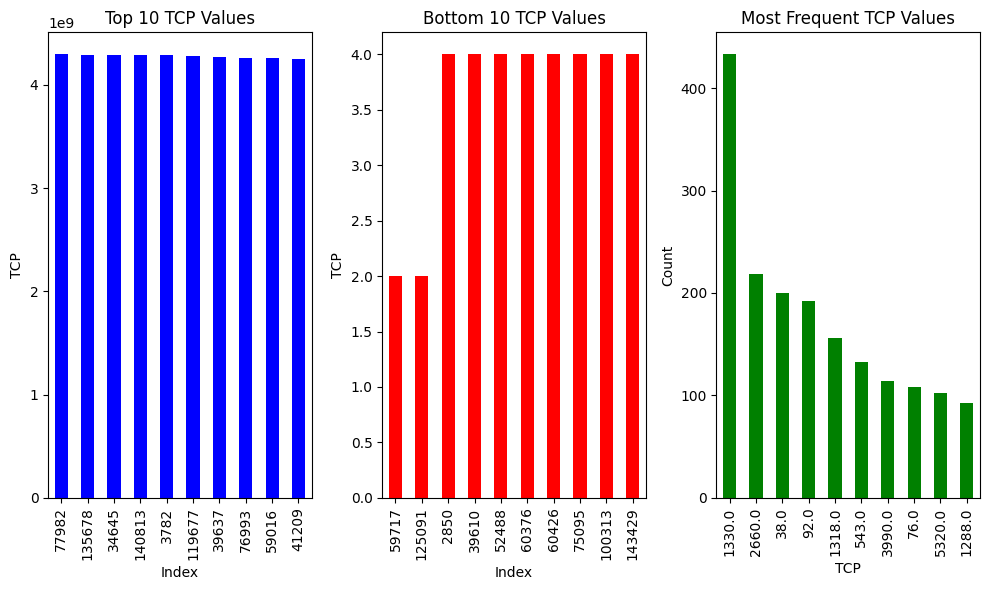

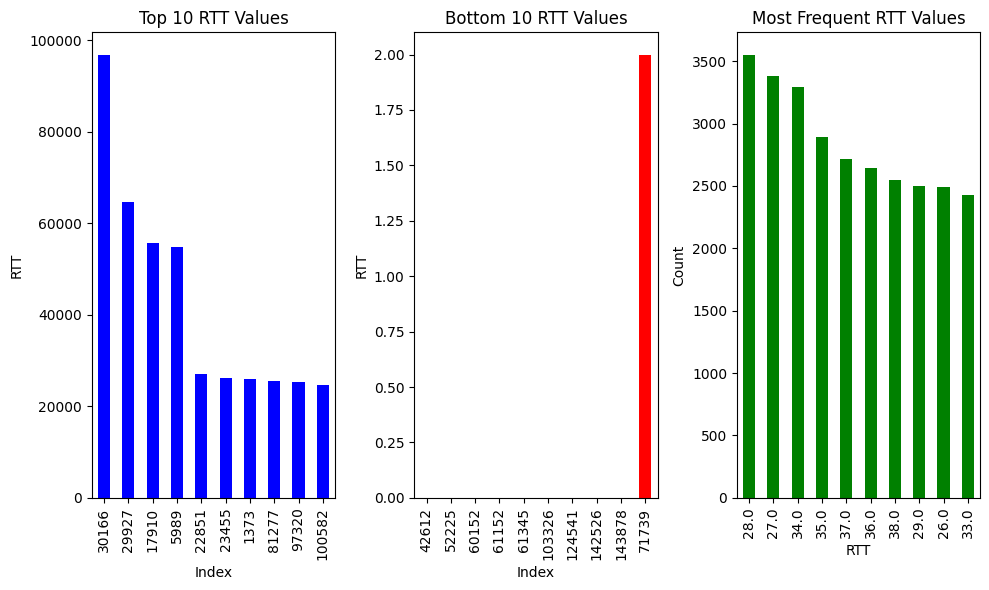

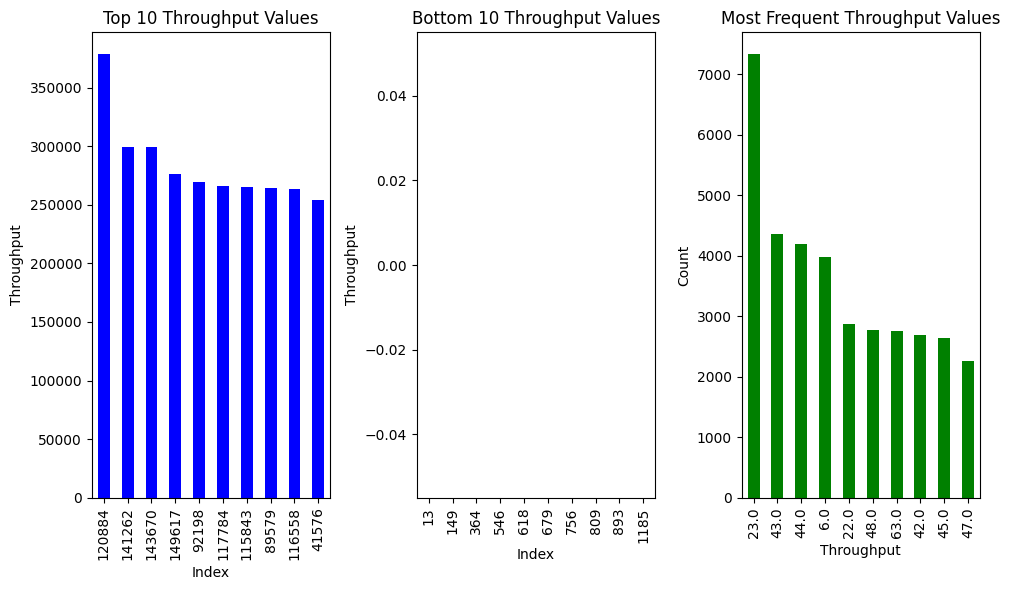

In [15]:
import matplotlib.pyplot as plt

class UserExperienceAnalysis:
    def __init__(self, user_data1):
        self.user_data1 = user_data1

    def aggregate_per_customer(self):
        # Aggregate per customer information
        per_customer_info = self.user_data1.groupby('MSISDN/Number').agg({
            'Avg RTT DL (ms)': 'mean',
            'Avg Bearer TP DL (kbps)': 'mean',
            'Handset Type': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,
            'TCP DL Retrans. Vol (Bytes)': 'mean'
        })
        return per_customer_info

    def summary_statistics(self, per_customer_info):
        # Summary statistics
        summary_stats = per_customer_info.describe()
        return summary_stats

    def compute_top_bottom_frequent_values(self):
        # Compute top, bottom, and most frequent values for TCP, RTT, and Throughput
        top_bottom_frequent_values = {}

        # TCP values
        top_bottom_frequent_values['TCP'] = {
            'Top': self.user_data1['TCP DL Retrans. Vol (Bytes)'].nlargest(10),
            'Bottom': self.user_data1['TCP DL Retrans. Vol (Bytes)'].nsmallest(10),
            'Most Frequent': self.user_data1['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)
        }

        # RTT values
        top_bottom_frequent_values['RTT'] = {
            'Top': self.user_data1['Avg RTT DL (ms)'].nlargest(10),
            'Bottom': self.user_data1['Avg RTT DL (ms)'].nsmallest(10),
            'Most Frequent': self.user_data1['Avg RTT DL (ms)'].value_counts().head(10)
        }

        # Throughput values
        top_bottom_frequent_values['Throughput'] = {
            'Top': self.user_data1['Avg Bearer TP DL (kbps)'].nlargest(10),
            'Bottom': self.user_data1['Avg Bearer TP DL (kbps)'].nsmallest(10),
            'Most Frequent': self.user_data1['Avg Bearer TP DL (kbps)'].value_counts().head(10)
        }

        return top_bottom_frequent_values

    def plot_top_bottom_most_frequent(self, values, metric):
        plt.figure(figsize=(10, 6))

        # Plot top values
        plt.subplot(1, 3, 1)
        values['Top'].plot(kind='bar', color='blue')
        plt.title(f'Top 10 {metric} Values')
        plt.xlabel('Index')
        plt.ylabel(metric)

        # Plot bottom values
        plt.subplot(1, 3, 2)
        values['Bottom'].plot(kind='bar', color='red')
        plt.title(f'Bottom 10 {metric} Values')
        plt.xlabel('Index')
        plt.ylabel(metric)

        # Plot most frequent values
        plt.subplot(1, 3, 3)
        values['Most Frequent'].plot(kind='bar', color='green')
        plt.title(f'Most Frequent {metric} Values')
        plt.xlabel(metric)
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Instantiate the UserExperienceAnalysis class with your user_data DataFrame
experience_analytics = UserExperienceAnalysis(user_data1)

# Call the method to compute top, bottom, and most frequent values for TCP, RTT, and Throughput
top_bottom_frequent_values = experience_analytics.compute_top_bottom_frequent_values()

# Plot TCP values
experience_analytics.plot_top_bottom_most_frequent(top_bottom_frequent_values['TCP'], 'TCP')

# Plot RTT values
experience_analytics.plot_top_bottom_most_frequent(top_bottom_frequent_values['RTT'], 'RTT')

# Plot Throughput values
experience_analytics.plot_top_bottom_most_frequent(top_bottom_frequent_values['Throughput'], 'Throughput')


In [10]:
class UserExperienceAnalysis:
    def __init__(self, user_data1):
        self.user_data1 = user_data1

    def compute_top_bottom_frequent_values(self):
        # Compute top, bottom, and most frequent values
        top_tcp = self.user_data1['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
        bottom_tcp = self.user_data1['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
        most_frequent_tcp = self.user_data1['TCP DL Retrans. Vol (Bytes)'].mode()

        top_rtt = self.user_data1['Avg RTT DL (ms)'].nlargest(10)
        bottom_rtt = self.user_data1['Avg RTT DL (ms)'].nsmallest(10)
        most_frequent_rtt = self.user_data1['Avg RTT DL (ms)'].mode()

        top_throughput = self.user_data1['Avg Bearer TP DL (kbps)'].nlargest(10)
        bottom_throughput = self.user_data1['Avg Bearer TP DL (kbps)'].nsmallest(10)
        most_frequent_throughput = self.user_data1['Avg Bearer TP DL (kbps)'].mode()

        return {
            'top_tcp': top_tcp,
            'bottom_tcp': bottom_tcp,
            'most_frequent_tcp': most_frequent_tcp,
            'top_rtt': top_rtt,
            'bottom_rtt': bottom_rtt,
            'most_frequent_rtt': most_frequent_rtt,
            'top_throughput': top_throughput,
            'bottom_throughput': bottom_throughput,
            'most_frequent_throughput': most_frequent_throughput
        }

# Instantiate the UserExperienceAnalysis class with your user_data DataFrame
experience_analytics = UserExperienceAnalysis(user_data1)

# Call the method to compute top, bottom, and most frequent values
result = experience_analytics.compute_top_bottom_frequent_values()

# Print the result
print(result)


{'top_tcp': 77982     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119677    4.275259e+09
39637     4.268432e+09
76993     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'bottom_tcp': 59717     2.0
125091    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75095     4.0
100313    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'most_frequent_tcp': 0    1330.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'top_rtt': 30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81277     25602.0
97320     25374.0
100582    24733.0
Name: Avg RTT DL (ms), dtype: float64, 'bottom_rtt': 42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103326    0.0
124541    0.0
142526    0.0
143878    0.0
71739     2.0
Name: Avg RTT DL (ms), dtype: floa

In [ ]:
# Compute and report distribution

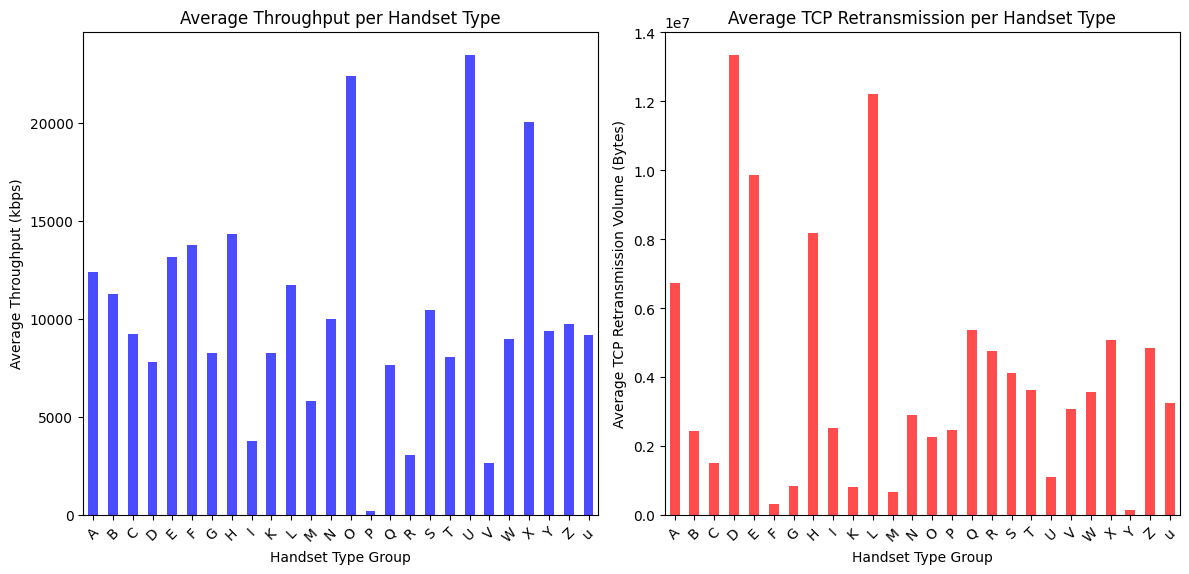

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by handset type and calculate the average throughput and TCP retransmission
per_handset_statistics = user_data1.groupby('Handset Type').agg({
    'Avg Bearer TP DL (kbps)': 'mean',  # Average throughput
    'TCP DL Retrans. Vol (Bytes)': 'mean'  # Average TCP retransmission
})
grouped_handset_statistics = per_handset_statistics.groupby(lambda x: x[:1]).mean()

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for average throughput per handset type
plt.subplot(1, 2, 1)
grouped_handset_statistics['Avg Bearer TP DL (kbps)'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type Group')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot for average TCP retransmission per handset type
plt.subplot(1, 2, 2)
grouped_handset_statistics['TCP DL Retrans. Vol (Bytes)'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type Group')
plt.ylabel('Average TCP Retransmission Volume (Bytes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [ ]:
#  Perform k-means clustering

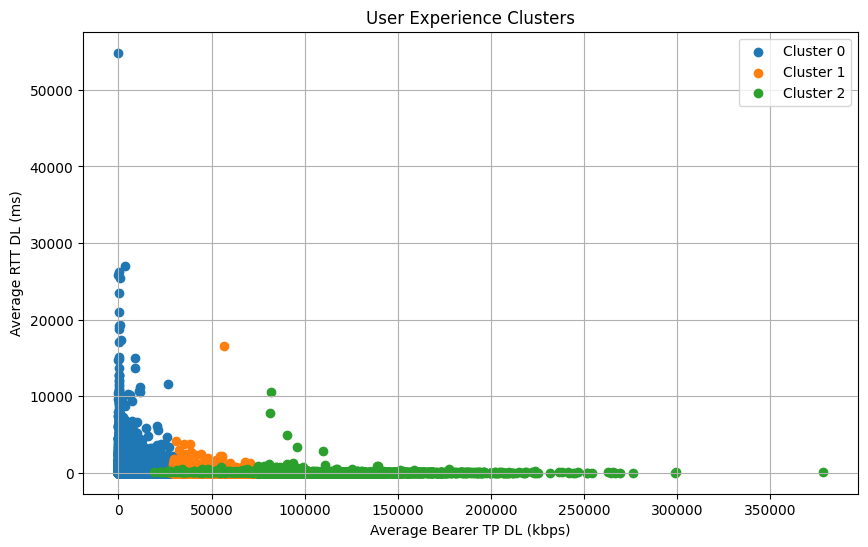

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class UserExperienceAnalysis:
    def __init__(self, user_data1):
        self.user_data1 = user_data1

    def normalize_and_cluster(self, columns):
        # Select the relevant columns and drop missing values
        selected_data = self.user_data1[columns].dropna()

        # Normalize the data
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(selected_data)

        # Perform k-means clustering with k=3
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(normalized_data)
        cluster_labels = kmeans.labels_

        # Add cluster labels to the DataFrame
        selected_data['Cluster'] = cluster_labels

        return selected_data

    def visualize_clusters(self, clustered_data):
        plt.figure(figsize=(10, 6))

        # Plot each cluster separately
        for cluster in clustered_data['Cluster'].unique():
            cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
            plt.scatter(cluster_data.iloc[:, 0],
                        cluster_data.iloc[:, 1],
                        label=f'Cluster {cluster}')

        plt.title('User Experience Clusters')
        plt.xlabel('Average Bearer TP DL (kbps)')
        plt.ylabel('Average RTT DL (ms)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Instantiate the UserExperienceAnalysis class with your user_data1 DataFrame
experience_analytics = UserExperienceAnalysis(user_data1)

# Define the columns for k-means clustering
columns_for_clustering = ['Avg Bearer TP DL (kbps)', 'Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)']

# Call the method to normalize and cluster
clustered_data = experience_analytics.normalize_and_cluster(columns_for_clustering)

# Visualize the clusters
experience_analytics.visualize_clusters(clustered_data)



Based on the clustering results, we have three clusters distinguished by the average bearer throughput (Avg Bearer TP DL), average round-trip time (Avg RTT DL), and TCP download retransmission volume (TCP DL Retrans. Vol):

Cluster 0:

Average Bearer Throughput (Avg Bearer TP DL): High
Average Round-Trip Time (Avg RTT DL): Low
TCP Download Retransmission Volume (TCP DL Retrans. Vol): Low
This cluster represents users with high throughput, low latency, and minimal TCP retransmission, indicating a stable and efficient network connection.
Cluster 1:

Average Bearer Throughput (Avg Bearer TP DL): Moderate
Average Round-Trip Time (Avg RTT DL): Moderate
TCP Download Retransmission Volume (TCP DL Retrans. Vol): Moderate
This cluster consists of users with moderate throughput, moderate latency, and moderate TCP retransmission, suggesting average network performance.
Cluster 2:

Average Bearer Throughput (Avg Bearer TP DL): Low
Average Round-Trip Time (Avg RTT DL): High
TCP Download Retransmission Volume (TCP DL Retrans. Vol): High
Users in this cluster experience low throughput, high latency, and high TCP retransmission, indicating poor network conditions and potential network congestion or packet loss issues.
These clusters provide insights into different user experiences based on network performance metrics, allowing for targeted optimization strategies to improve overall user satisfaction and network efficiency.

Length of DataFrame index: 150001
